<a href="https://colab.research.google.com/github/yashjain-99/Projects/blob/main/CovidDataAnalysis_yash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Covid19 Data Analysis
author: Yash Jain @https://github.com/yashjain-99/

In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date
from plotly import express as px

# **CountryWise Dataset**

In [ ]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-25-2021.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3830 non-null   object 
 3   Country_Region       4004 non-null   object 
 4   Last_Update          4004 non-null   object 
 5   Lat                  3915 non-null   float64
 6   Long_                3915 non-null   float64
 7   Confirmed            4004 non-null   int64  
 8   Deaths               4004 non-null   int64  
 9   Recovered            727 non-null    float64
 10  Active               727 non-null    float64
 11  Combined_Key         4004 non-null   object 
 12  Incident_Rate        3914 non-null   float64
 13  Case_Fatality_Ratio  3960 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 438.1+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-05-26 04:20:35,33.93911,67.709953,66903,2836,56518.0,7549.0,Afghanistan,171.861935,4.238973
1,NaN,NaN,NaN,Albania,2021-05-26 04:20:35,41.15330,20.168300,132229,2447,128907.0,875.0,Albania,4594.794635,1.850577
2,NaN,NaN,NaN,Algeria,2021-05-26 04:20:35,28.03390,1.659600,127361,3433,88672.0,35256.0,Algeria,290.440070,2.695488
3,NaN,NaN,NaN,Andorra,2021-05-26 04:20:35,42.50630,1.521800,13664,127,13263.0,274.0,Andorra,17684.591989,0.929450
4,NaN,NaN,NaN,Angola,2021-05-26 04:20:35,-11.20270,17.873900,32933,735,27204.0,4994.0,Angola,100.203041,2.231804


In [ ]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Afghanistan,33.93911,67.709953,66903,2836,56518.0,7549.0,171.861935,4.238973
1,Albania,41.15330,20.168300,132229,2447,128907.0,875.0,4594.794635,1.850577
2,Algeria,28.03390,1.659600,127361,3433,88672.0,35256.0,290.440070,2.695488
3,Andorra,42.50630,1.521800,13664,127,13263.0,274.0,17684.591989,0.929450
4,Angola,-11.20270,17.873900,32933,735,27204.0,4994.0,100.203041,2.231804


In [ ]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3915.000000,3915.000000,4.004000e+03,4004.000000,7.270000e+02,7.270000e+02,3914.000000,3960.000000
mean,35.816832,-71.326815,4.203641e+04,899.588911,1.441884e+05,4.268093e+04,8860.377153,2.776366
std,13.225854,54.888966,2.324347e+05,5077.506346,4.263394e+05,2.483277e+05,3963.224872,45.055664
min,-52.368000,-178.116500,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,33.208763,-96.588297,1.134750e+03,19.000000,6.835000e+02,3.655000e+02,6825.073294,1.205631
50%,37.901449,-86.764210,3.161000e+03,57.000000,1.820900e+04,2.743000e+03,9514.966239,1.761285
75%,42.180139,-77.393473,1.330825e+04,204.000000,8.174700e+04,2.402150e+04,11375.460572,2.481976
max,71.706900,178.065000,5.626155e+06,112355.000000,5.218768e+06,5.117270e+06,38479.875309,2832.142857


In [ ]:
world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,66903,7549.0,56518.0,2836
1,Albania,132229,875.0,128907.0,2447
2,Algeria,127361,35256.0,88672.0,3433
3,Andorra,13664,274.0,13263.0,127
4,Angola,32933,4994.0,27204.0,735


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



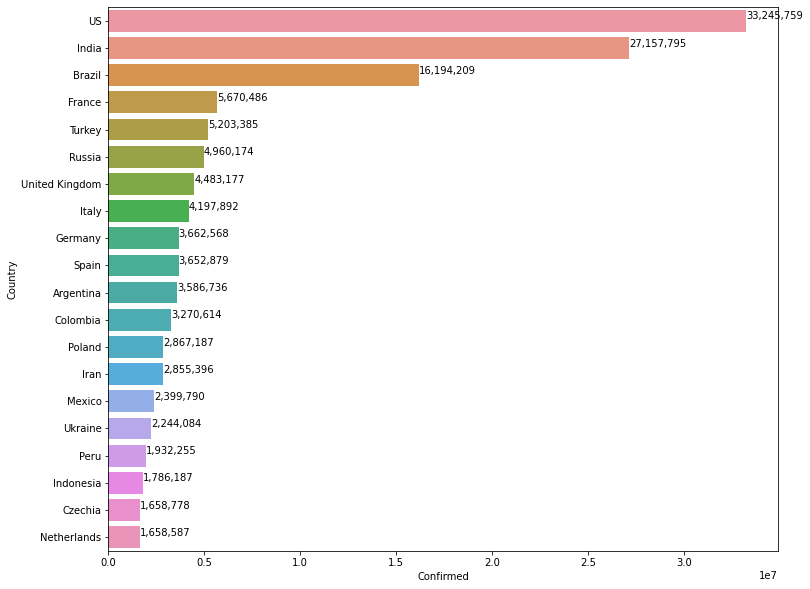

In [ ]:
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['Confirmed'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
  plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

# Plotly **bar**

In [ ]:
fig=px.bar(data_frame=top_20, x='Country', y='Confirmed')
fig.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

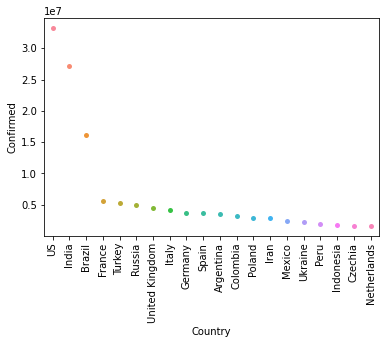

In [ ]:
ax = sns.swarmplot(x= top_20['Country'],y=top_20['Confirmed'],data=top_20)
plt.xticks(rotation=90)

# **India DataSet**

In [ ]:
cdf=pd.read_excel('/content/filteredCovid.xlsx')
cdf=cdf.sort_values(by=['State/UnionTerritory', 'Date'])
cdf=cdf.reset_index()
cdf.head()

,index,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,10084,2021-01-01,08:00:00,Andaman and Nicobar Islands,-,-,4826,62,4945
1,37,11164,2021-01-31,08:00:00,Andaman and Nicobar Islands,-,-,4928,62,4994
2,73,11200,2021-02-01,08:00:00,Andaman and Nicobar Islands,-,-,4928,62,4994
3,109,12172,2021-02-28,08:00:00,Andaman and Nicobar Islands,-,-,4952,62,5018
4,145,12208,2021-03-01,08:00:00,Andaman and Nicobar Islands,-,-,4952,62,5020


In [ ]:
cdf['Date']= pd.to_datetime(cdf['Date']).dt.normalize()

In [ ]:
cdf.drop(['index', 'Sno','Time','ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths'], axis=1, inplace=True)
cdf.rename(columns={'State/UnionTerritory': "State"}, inplace=True)
cdf.head()

,Date,State,Confirmed
0,2021-01-01,Andaman and Nicobar Islands,4945
1,2021-01-31,Andaman and Nicobar Islands,4994
2,2021-02-01,Andaman and Nicobar Islands,4994
3,2021-02-28,Andaman and Nicobar Islands,5018
4,2021-03-01,Andaman and Nicobar Islands,5020


In [ ]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       576 non-null    datetime64[ns]
 1   State      576 non-null    object        
 2   Confirmed  576 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 13.6+ KB


In [ ]:
cdf.describe()

,Confirmed
count,5.760000e+02
mean,5.704934e+05
std,9.286255e+05
min,0.000000e+00
25%,3.151825e+04
50%,2.573040e+05
75%,7.658858e+05
max,6.363442e+06


**Datewise**

In [ ]:
Datewise = cdf.groupby("Date")['Confirmed'].sum().reset_index()

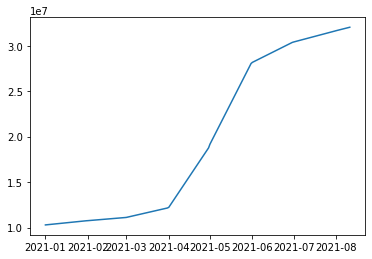

In [ ]:
plt.plot(Datewise['Date'], Datewise['Confirmed'])

# **Plotly**

In [ ]:
fig=px.line(data_frame=Datewise,x='Date',y='Confirmed')
fig.show()

**StateWise**

In [ ]:
sample = cdf.groupby("State")['Confirmed'].sum().reset_index()
sample.style.background_gradient(cmap='Reds')

,State,Confirmed
0,Andaman and Nicobar Islands,98501
1,Andhra Pradesh,21495307
2,Arunachal Pradesh,426645
3,Assam,5564397
4,Bihar,7782303
5,Chandigarh,672554
6,Chhattisgarh,10587830
7,Dadra and Nagar Haveli and Daman and Diu,112732
8,Delhi,16797900
9,Goa,1720858


([<matplotlib.patches.Wedge at 0x7efdbfa51fd0>,
 [Text(2.1999990244994563, 0.0020717628824681853, 'Andaman and Nicobar Islands'),
  Text(2.1528587891472277, 0.45298899985709706, 'Andhra Pradesh'),
  Text(2.011504135125583, 0.8909832290075279, 'Arunachal Pradesh'),
  Text(1.9572007106387759, 1.0046717763902158, 'Assam'),
  Text(1.8134404508289927, 1.2455656270534847, 'Bihar'),
  Text(1.7069474494055186, 1.3879230544118775, 'Chandigarh'),
  Text(1.5479388131512417, 1.5632931365357954, 'Chhattisgarh'),
  Text(1.3801968549302992, 1.7132007009222565, 'Dadra and Nagar Haveli and Daman and Diu'),
  Text(1.0864255743345537, 1.9130288736534626, 'Delhi'),
  Text(0.7325132429382082, 2.0744696548564288, 'Goa'),
  Text(0.5209218062031884, 2.137437828761812, 'Gujarat'),
  Text(0.16775762997609062, 2.193594624716428, 'Haryana'),
  Text(-0.04777427131430424, 2.1994812158780506, 'Himachal Pradesh'),
  Text(-0.1616935937635819, 2.194049949690257, 'Jammu and Kashmir'),
  Text(-0.3104980770331046, 2.17797

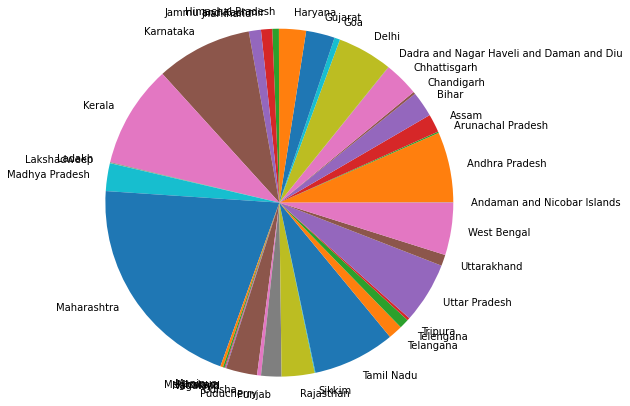

In [ ]:
plt.pie(sample['Confirmed'],labels=sample['State'],radius=2)

# **Plotly Pie**

In [ ]:
fig=px.pie(data_frame=sample, values='Confirmed', names='State', labels='State')
fig.show()

States with Least Confirmed **Cases**

In [ ]:
bottom15=sample.sort_values(by=['Confirmed'], ascending=True).head(15)
for i in bottom15['State']:
  print(i)

Lakshadweep
Andaman and Nicobar Islands
Dadra and Nagar Haveli and Daman and Diu
Sikkim
Mizoram
Ladakh
Nagaland
Arunachal Pradesh
Meghalaya
Chandigarh
Tripura
Manipur
Puducherry
Goa
Himachal Pradesh


In [ ]:
cdf = cdf[cdf.State.isin(bottom15['State']) == False]

In [ ]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 16 to 575
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       336 non-null    datetime64[ns]
 1   State      336 non-null    object        
 2   Confirmed  336 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.5+ KB


In [ ]:
cdf=cdf.reset_index()
cdf.head()

,index,Date,State,Confirmed
0,16,2021-01-01,Andhra Pradesh,882286
1,17,2021-01-31,Andhra Pradesh,887720
2,18,2021-02-01,Andhra Pradesh,887836
3,19,2021-02-28,Andhra Pradesh,889799
4,20,2021-03-01,Andhra Pradesh,889916


Plot swarmplot with States excluding bottom 15

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

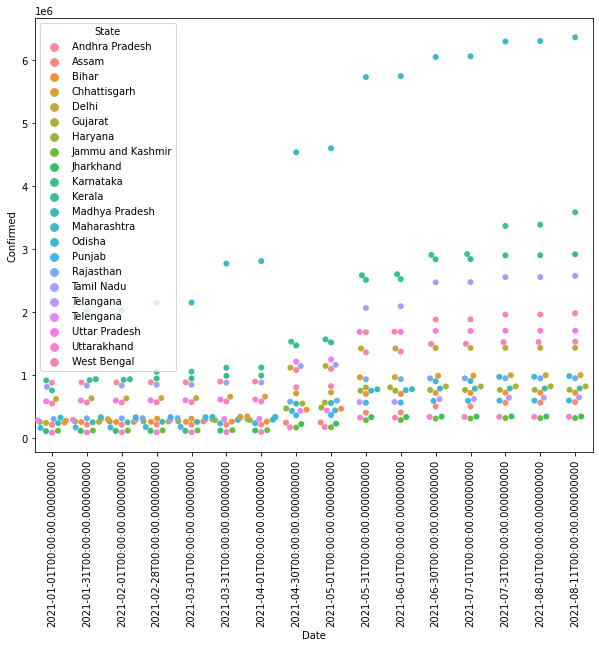

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.swarmplot(x= cdf['Date'],y=cdf['Confirmed'],hue='State',size=6 ,data=cdf)
plt.xticks(rotation=90)

Data of 2021-08-11

In [ ]:
last=cdf.loc[cdf['Date']=="2021-08-11"]
last

,index,Date,State,Confirmed
15,31,2021-08-11,Andhra Pradesh,1985182
31,63,2021-08-11,Assam,576149
47,79,2021-08-11,Bihar,725279
63,111,2021-08-11,Chhattisgarh,1003356
79,143,2021-08-11,Delhi,1436852
95,175,2021-08-11,Gujarat,825085
111,191,2021-08-11,Haryana,770114
127,223,2021-08-11,Jammu and Kashmir,322771
143,239,2021-08-11,Jharkhand,347440
159,255,2021-08-11,Karnataka,2921049


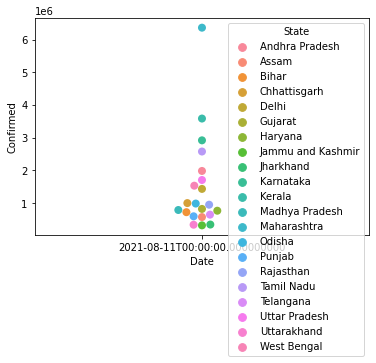

In [ ]:
ax = sns.swarmplot(x= last['Date'],y=last['Confirmed'],hue='State', size=8,data=last)

**Rate**

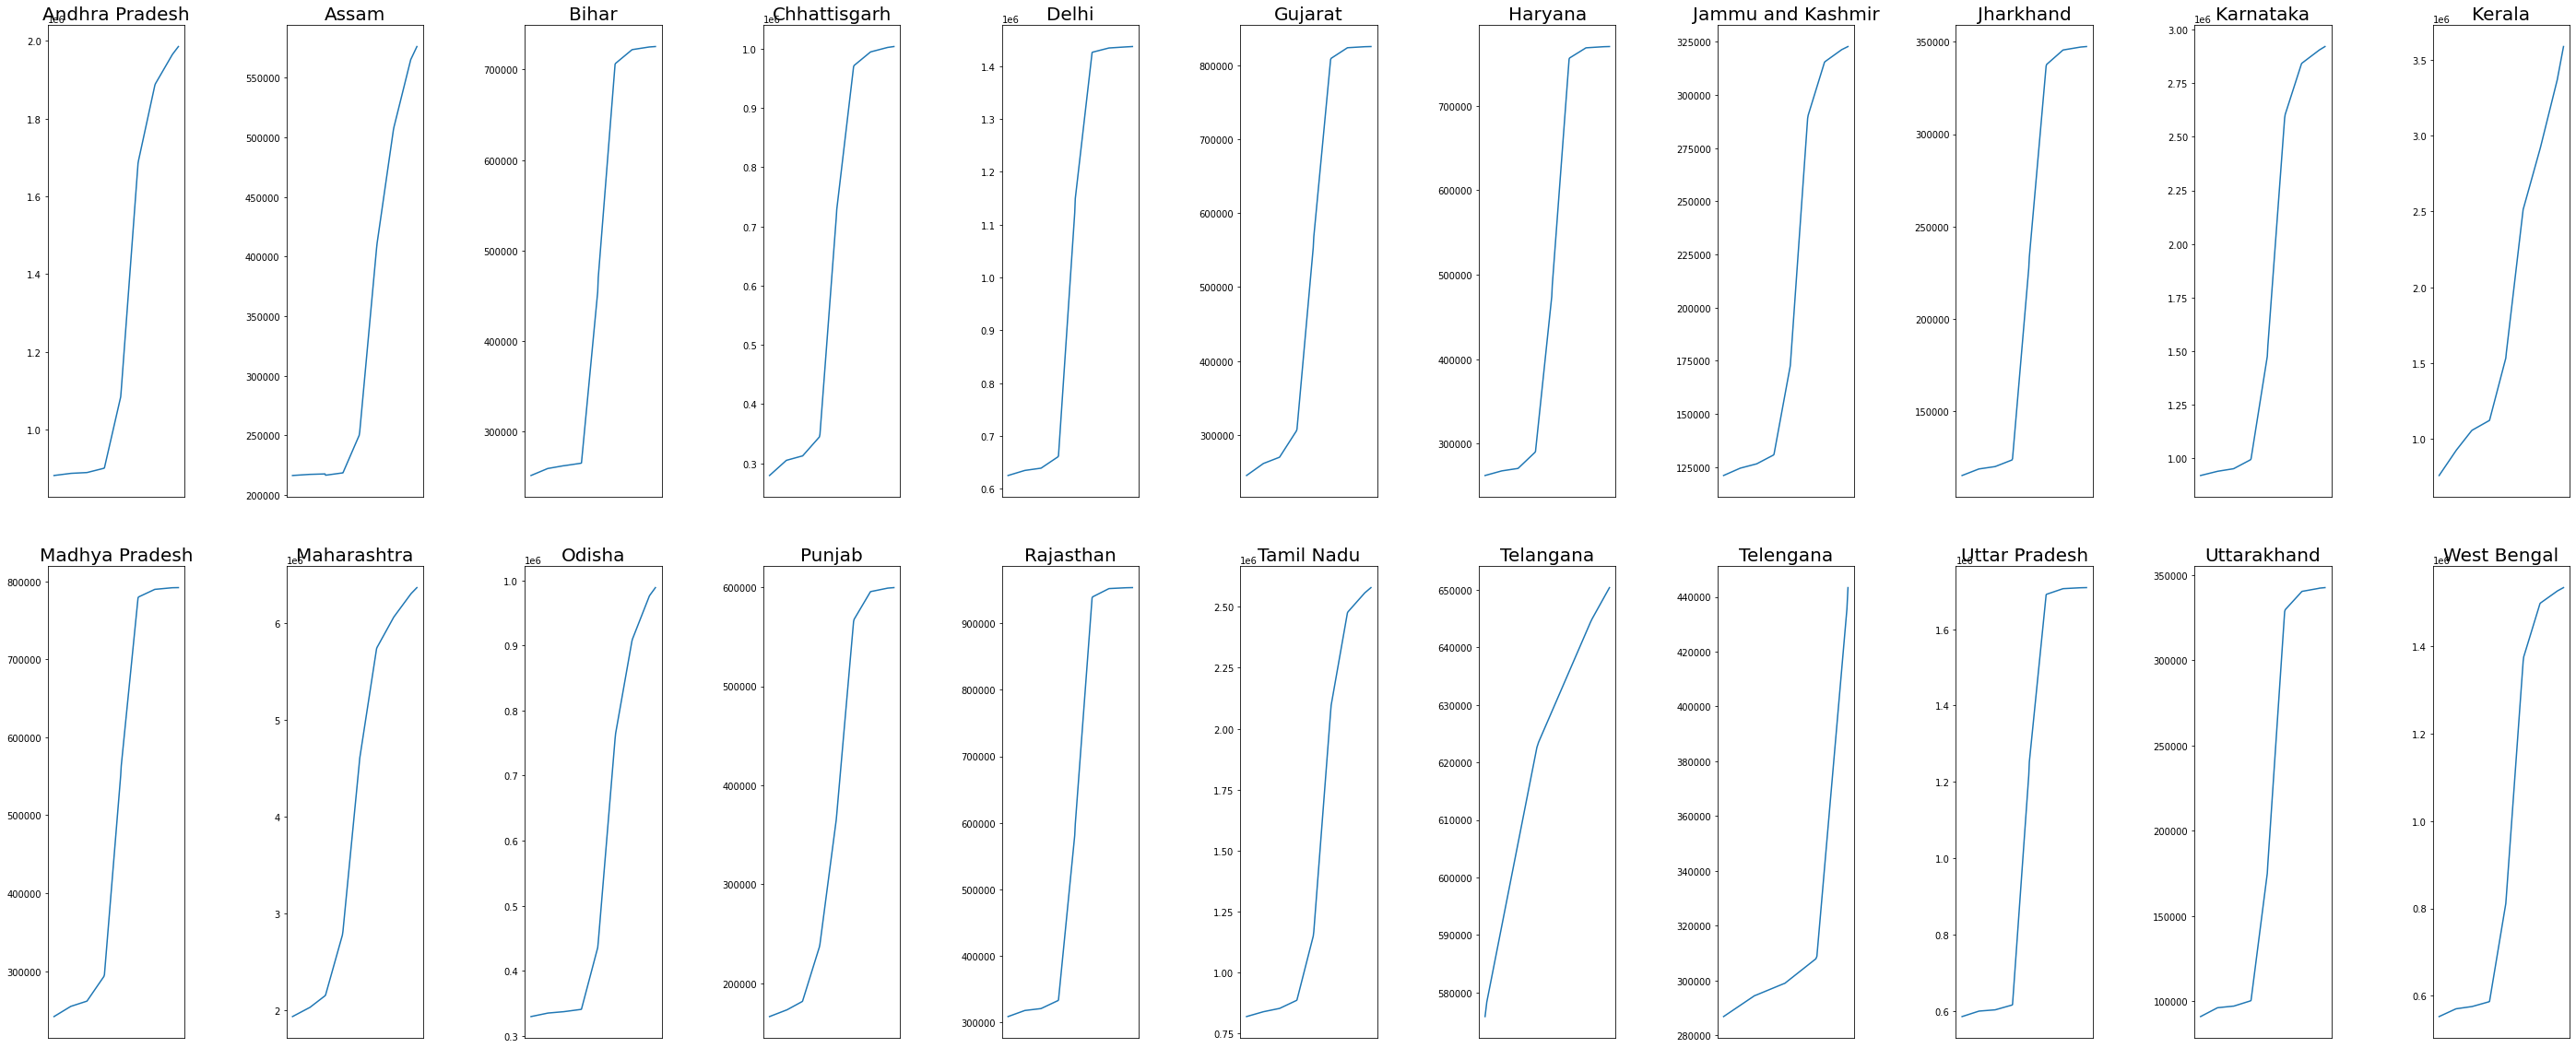

In [ ]:
states=cdf['State'].unique()
fig=plt.figure(figsize= (40,17))
for i in range(len(states)):
  ax = fig.add_subplot(2,11,i+1)
  info=cdf.loc[cdf['State']==states[i]]
  ax.plot(info['Date'],info['Confirmed'],label = 'Day wise Confirmed Cases ')
  plt.title(states[i],fontsize = 20)
  plt.xticks([],[])
plt.tight_layout(pad=5.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

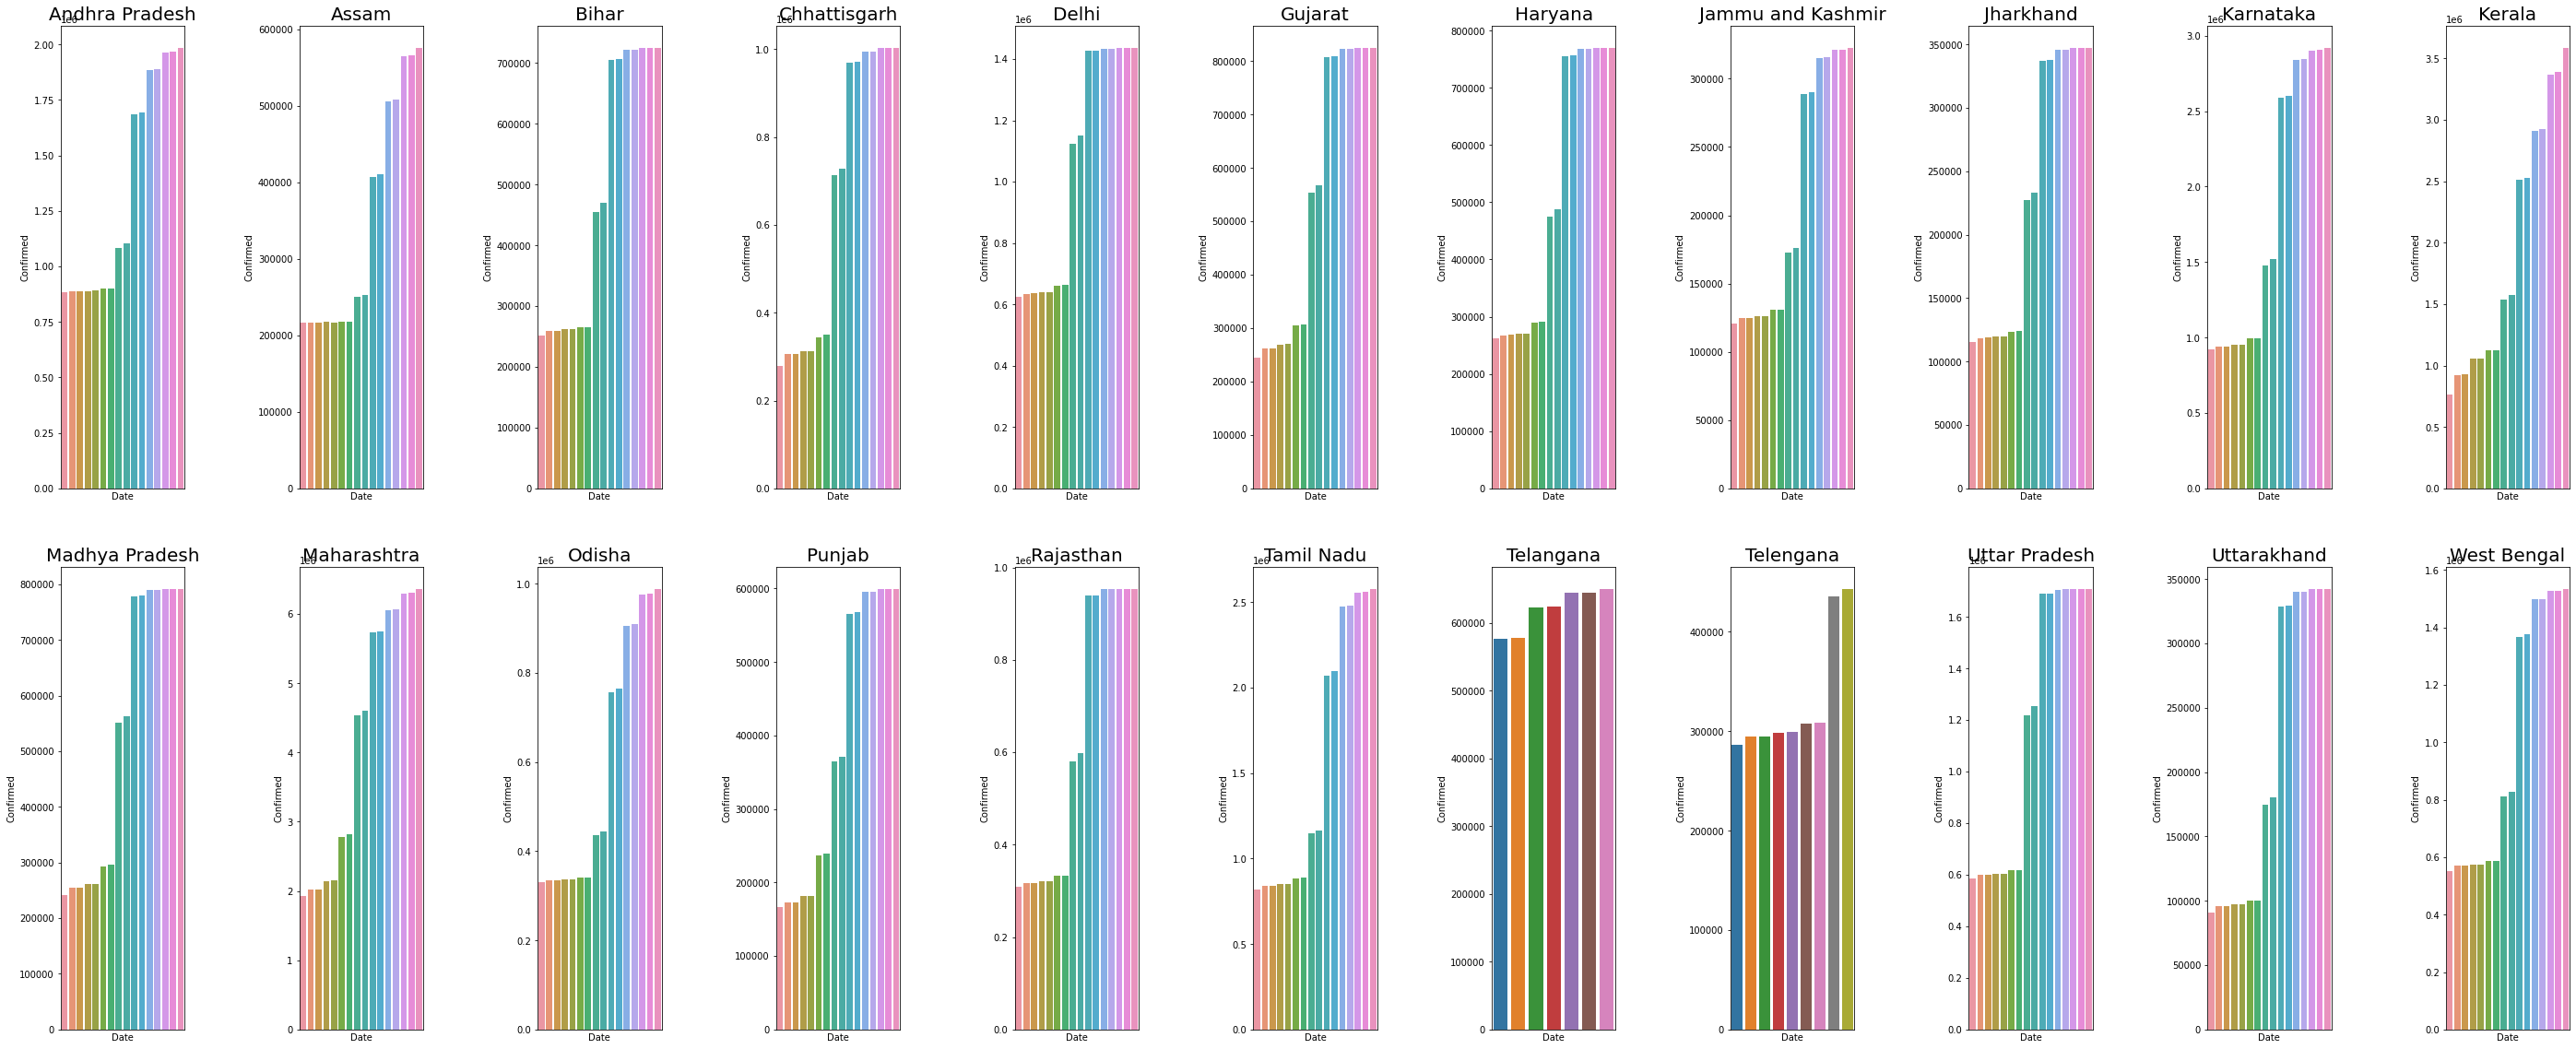

In [ ]:
states=cdf['State'].unique()
fig=plt.figure(figsize= (40,17))
for i in range(len(states)):
  ax = fig.add_subplot(2,11,i+1)
  info=cdf.loc[cdf['State']==states[i]]
  sns.barplot(info['Date'],info['Confirmed'],label = 'Day wise Confirmed Cases')
  plt.title(states[i],fontsize = 20)
  plt.xticks([],[])
plt.tight_layout(pad=5.0)